# Function Fitting

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x_axis, y_axis, colour_shape='b.', rows=1, columns=1, size=(10, 5)):
    fig, axes = plt.subplots(rows, columns, figsize=size)
    axes.plot(x_axis, y_axis, colour_shape)
    plt.show()

## load data

In [2]:
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/indices/index13.pickle")
train_idx = train_idx[5] #2

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores/1e+4
attempts = np.arange(15)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

Training data set: (301, 22832)


In [3]:
## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(301)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data

## make folder for each function

In [4]:
dcp.make_folders("Figs/curve_fitting/")

Figs/curve_fitting/ already present - Skipping pickling.


### exponential fit

#### Two parameters

Figs/curve_fitting/exponential2 already present - Skipping pickling.
cluster 1:
 - Curve Fitting Parameters: [ 2.98140567 -0.04246898]
 - Curve Fitting Cost: 1.3996659008536398

cluster 2:
 - Curve Fitting Parameters: [ 1.10389129  0.05595401]
 - Curve Fitting Cost: 1.8185754488227033

cluster 3:
 - Curve Fitting Parameters: [ 0.93649126  0.06850816]
 - Curve Fitting Cost: 2.665269044077182

cluster 4:
 - Curve Fitting Parameters: [ 1.65775785  0.01449799]
 - Curve Fitting Cost: 1.9449857436391986

cluster 5:
 - Curve Fitting Parameters: [ 1.37919657  0.03447753]
 - Curve Fitting Cost: 3.077091522732405

cluster 6:
 - Curve Fitting Parameters: [ 1.46206403  0.02717314]
 - Curve Fitting Cost: 3.0904857864869633

cluster 7:
 - Curve Fitting Parameters: [ 1.84752435  0.00645739]
 - Curve Fitting Cost: 1.6599409029321635

cluster 8:
 - Curve Fitting Parameters: [ 1.90532929  0.00558686]
 - Curve Fitting Cost: 1.7008465378376698

cluster 9:
 - Curve Fitting Parameters: [ 0.78642818  0.08048

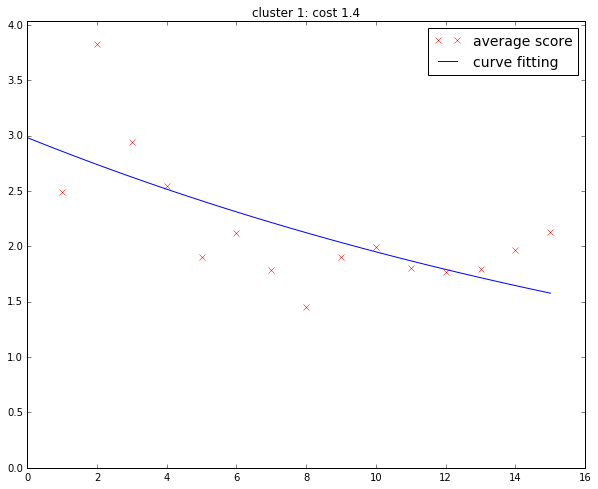

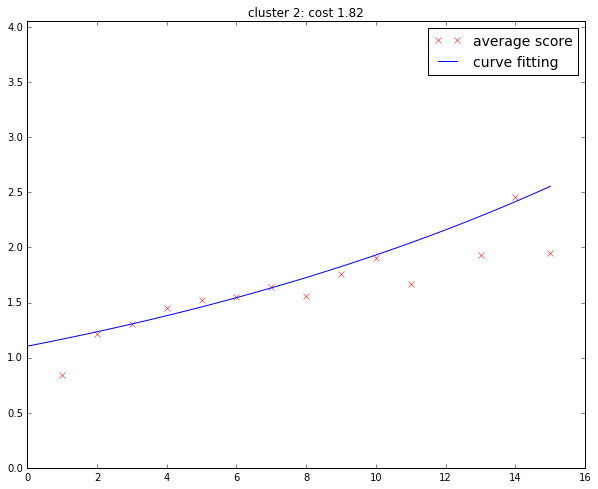

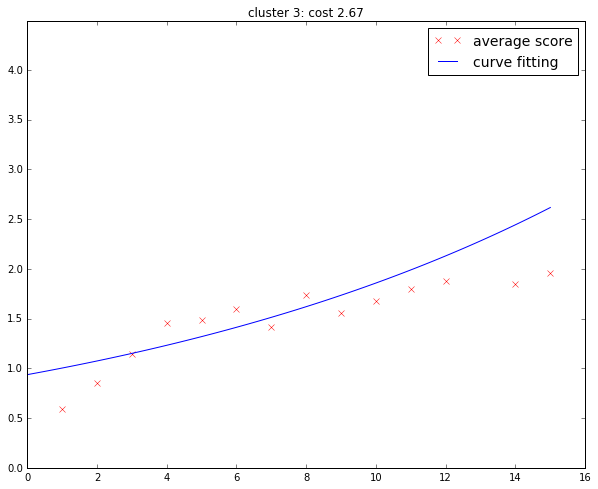

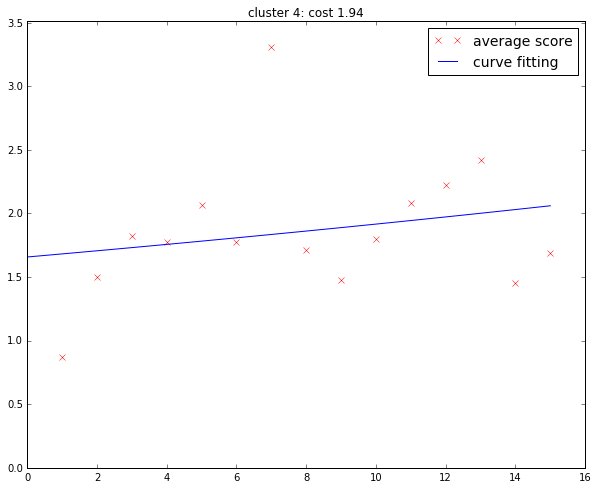

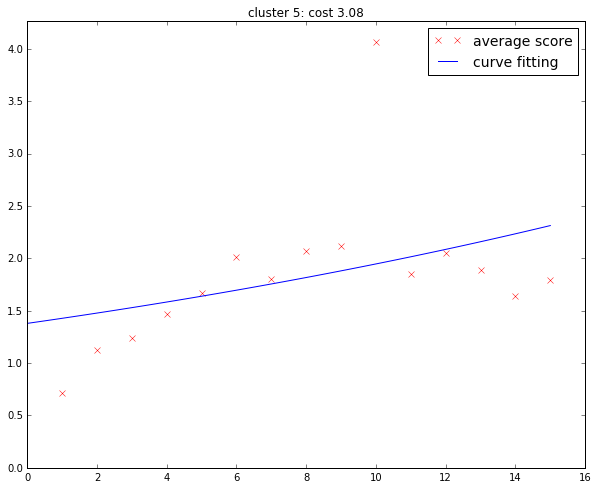

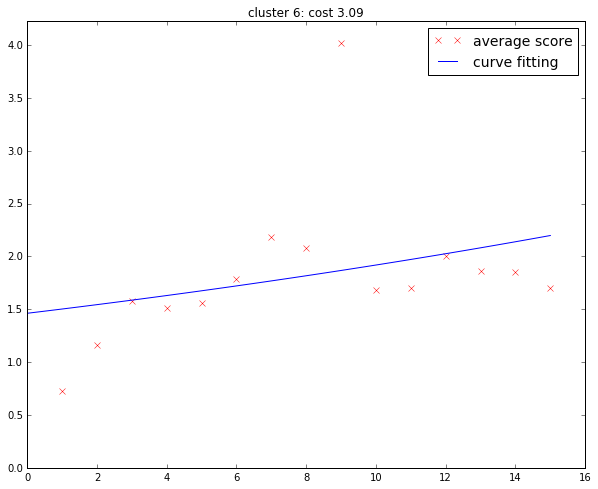

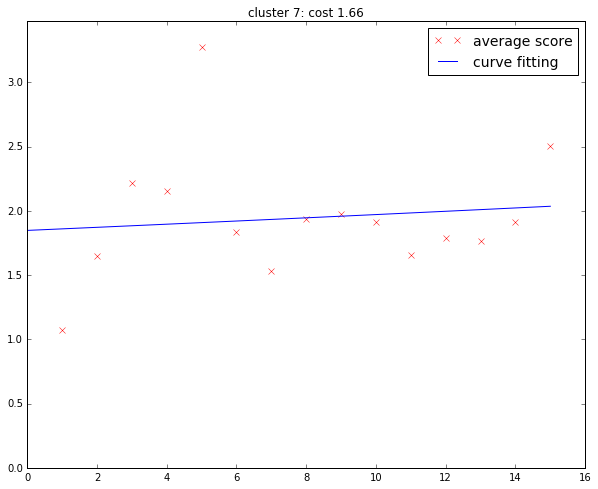

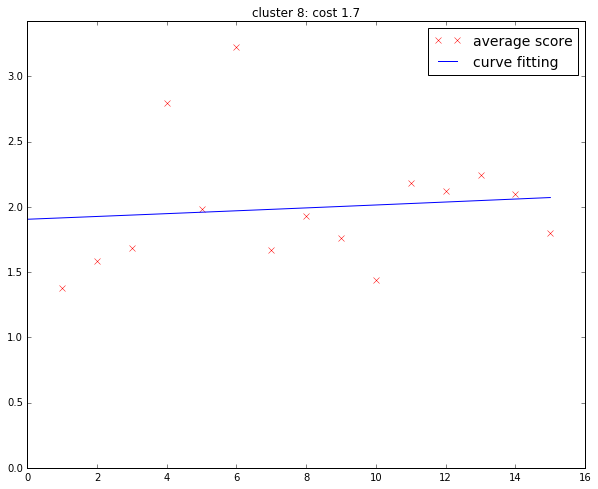

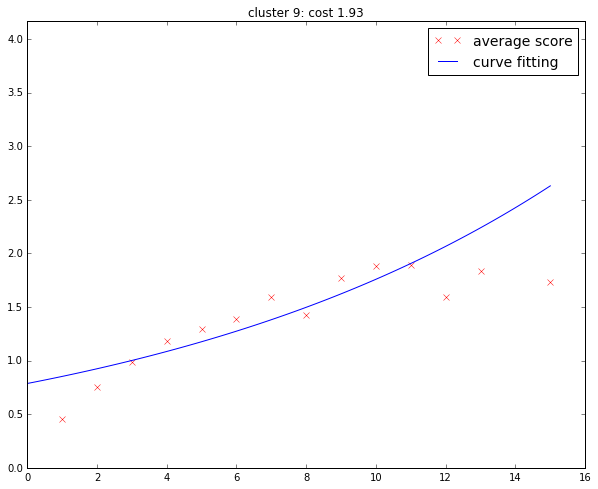

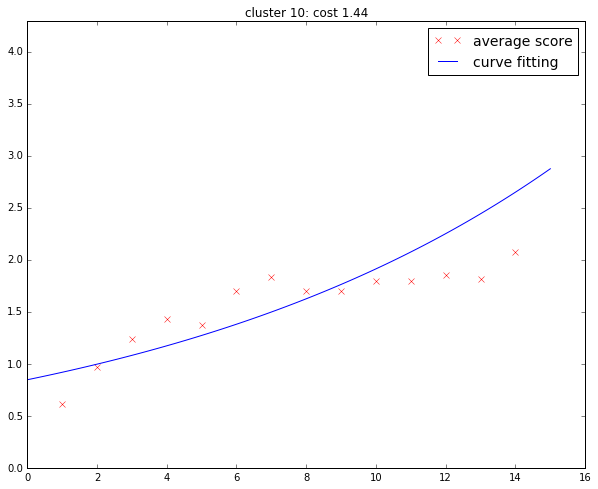

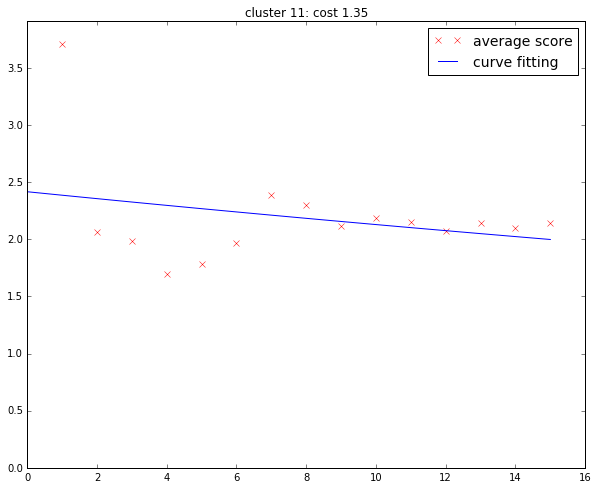

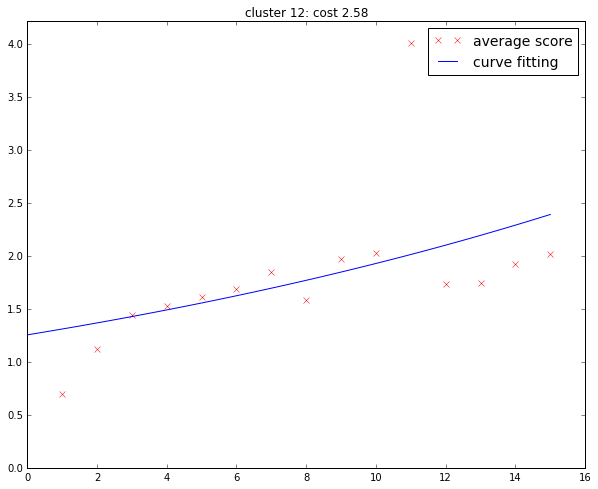

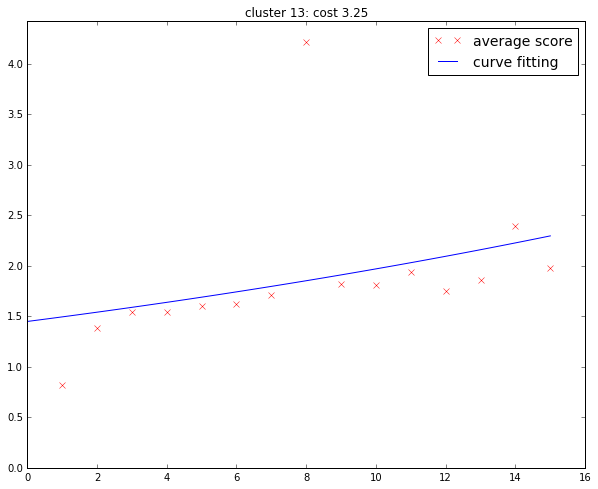

In [5]:
dcp.make_folders("Figs/curve_fitting/exponential2")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    opt = "exp2_opt{0}".format(i+1)
    cov = "exp2_cov{0}".format(i+1)
    cost = "exp2_cost{0}".format(i+1)
    opt, cost = cv.curve_Fitting(
        cv.exponential_least2, cv.exponential_curve2, 
        attempts, eval("avg{0}".format(i+1))[:15], seed, 
        "Figs/curve_fitting/exponential2/{0}".format(i+1), clt_num = i+1)

#### Three parameters

Figs/curve_fitting/exponential3 already present - Skipping pickling.
cluster 1:
 - Curve Fitting Parameters: [ 1.90061833  0.25667312  1.73838122]
 - Curve Fitting Cost: 1.1053389208485305

cluster 2:
 - Curve Fitting Parameters: [-2.75499342  0.06019612  3.53503192]
 - Curve Fitting Cost: 1.7242034758697802

cluster 3:
 - Curve Fitting Parameters: [-3.30202458  0.05739812  3.83768361]
 - Curve Fitting Cost: 2.537672763914301

cluster 4:
 - Curve Fitting Parameters: [-2.72659011  0.87971245  1.9937302 ]
 - Curve Fitting Cost: 1.4114601264659212

cluster 5:
 - Curve Fitting Parameters: [-2.21779684  0.35167858  2.18242667]
 - Curve Fitting Cost: 2.2523031086249556

cluster 6:
 - Curve Fitting Parameters: [-2.20854973  0.44587989  2.08902349]
 - Curve Fitting Cost: 2.3190164055761353

cluster 7:
 - Curve Fitting Parameters: [-4.52235944  1.53319718  2.02919845]
 - Curve Fitting Cost: 1.2346346550945309

cluster 8:
 - Curve Fitting Parameters: [-1.99763801  0.9593253   2.07568733]
 - Curv

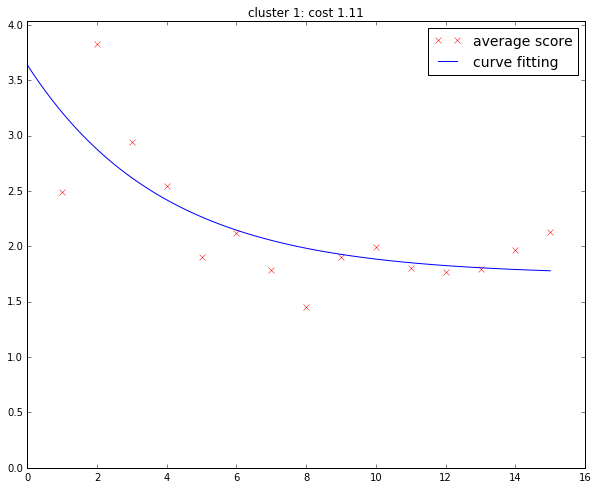

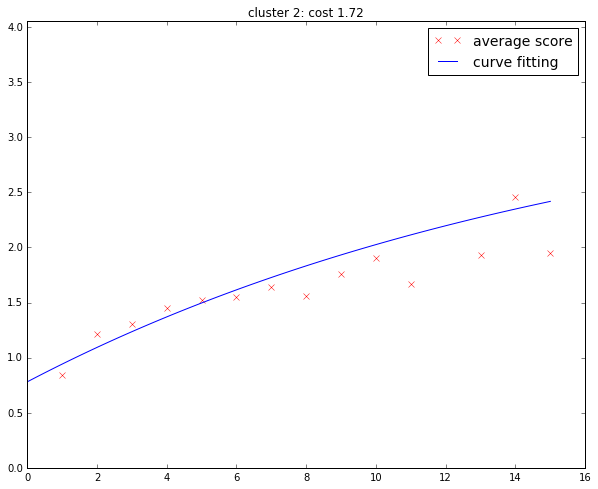

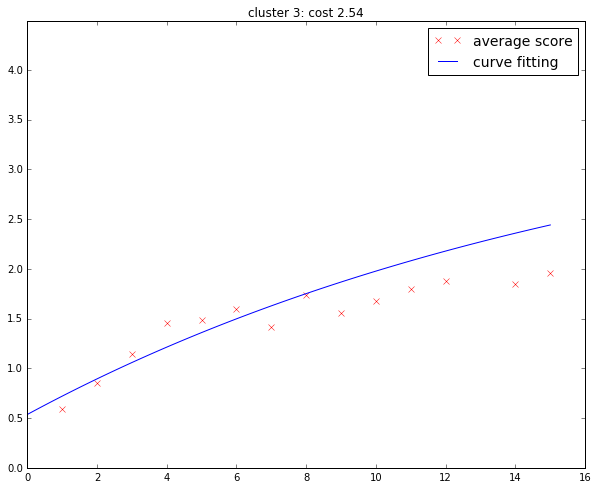

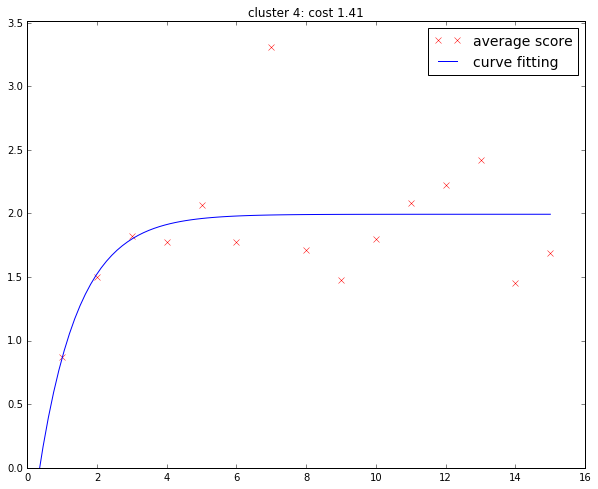

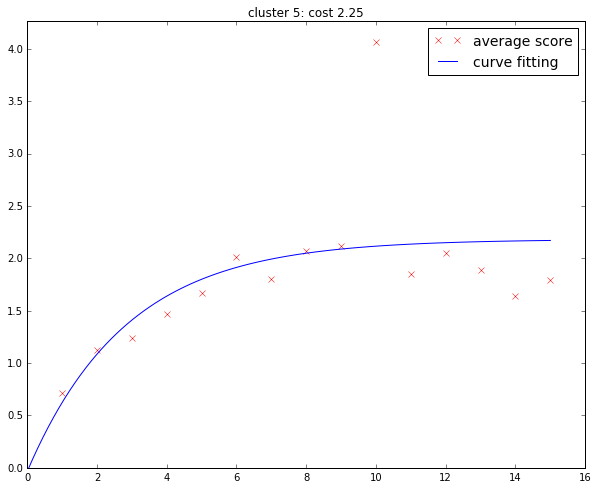

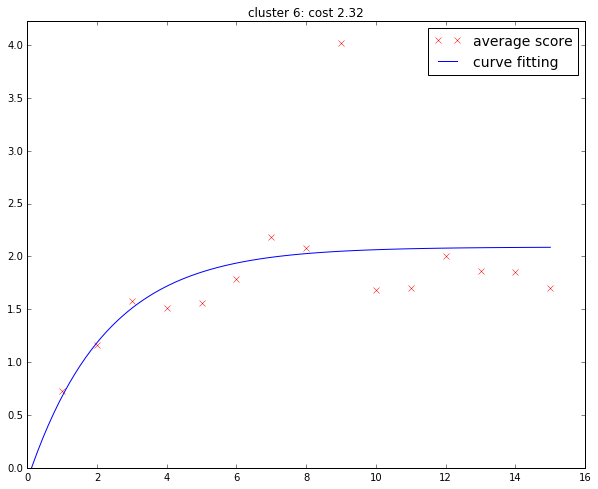

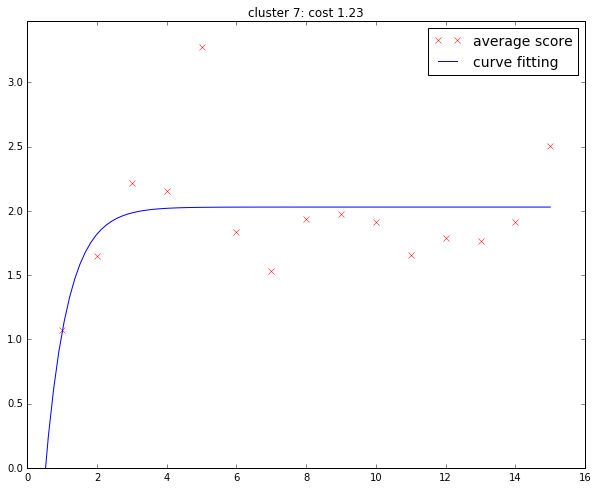

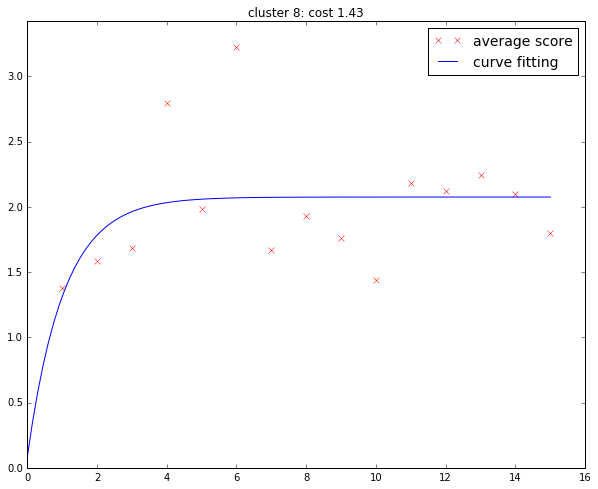

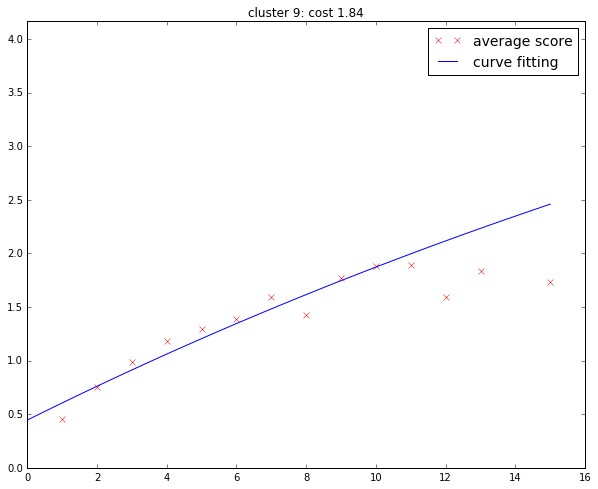

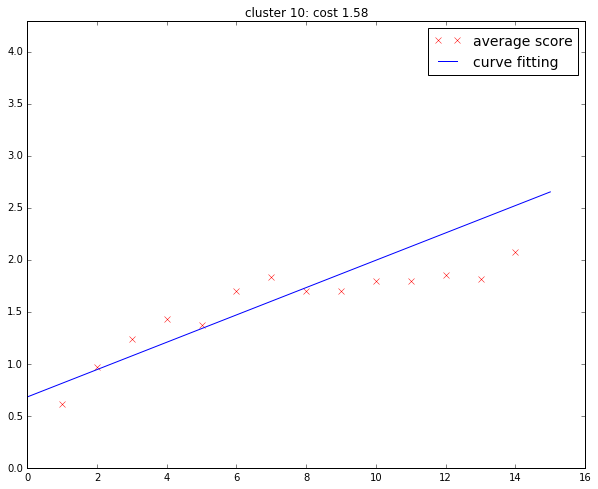

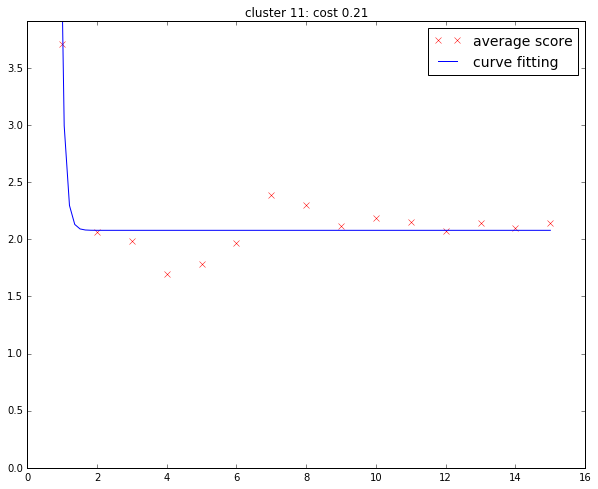

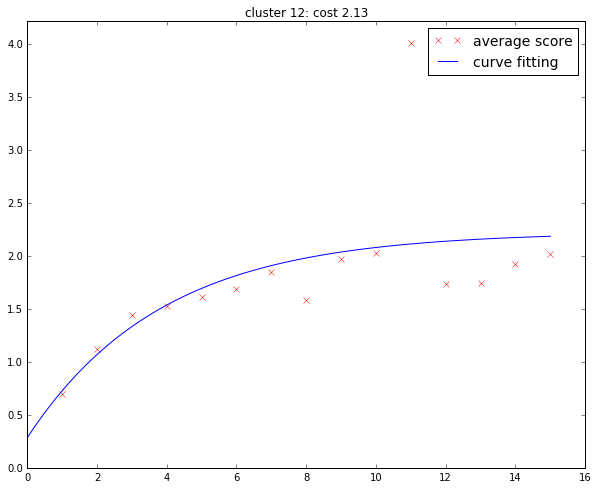

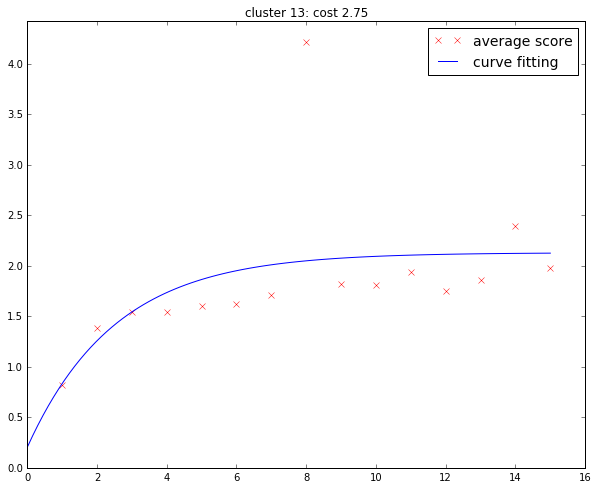

In [6]:
dcp.make_folders("Figs/curve_fitting/exponential3")

seed = [1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    opt = "exp3_opt{0}".format(i+1)
    cov = "exp3_cov{0}".format(i+1)
    cost = "exp3_cost{0}".format(i+1)
    opt, cost = cv.curve_Fitting(
        cv.exponential_least3, cv.exponential_curve3, 
        attempts, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/exponential3/{0}".format(i+1), clt_num = i+1)

### polynoimial fit

Figs/curve_fitting/polynomial2 already present - Skipping pickling.
cluster 1:
 - Curve Fitting Parameters: [ 2.81596744 -0.08172396]
 - Curve Fitting Cost: 1.514349136042655

cluster 2:
 - Curve Fitting Parameters: [ 0.9397386   0.10438428]
 - Curve Fitting Cost: 1.7490435703403366

cluster 3:
 - Curve Fitting Parameters: [ 0.71121992  0.12193874]
 - Curve Fitting Cost: 2.563359981649746

cluster 4:
 - Curve Fitting Parameters: [ 1.6221506   0.03033524]
 - Curve Fitting Cost: 1.9309597408107448

cluster 5:
 - Curve Fitting Parameters: [ 1.22795534  0.07568098]
 - Curve Fitting Cost: 2.9465940232906767

cluster 6:
 - Curve Fitting Parameters: [ 1.35686674  0.0588041 ]
 - Curve Fitting Cost: 3.0154859141991937

cluster 7:
 - Curve Fitting Parameters: [ 1.84293588  0.01290939]
 - Curve Fitting Cost: 1.6593096337959927

cluster 8:
 - Curve Fitting Parameters: [ 1.89866975  0.01178704]
 - Curve Fitting Cost: 1.6997648743251015

cluster 9:
 - Curve Fitting Parameters: [ 0.52574598  0.132289

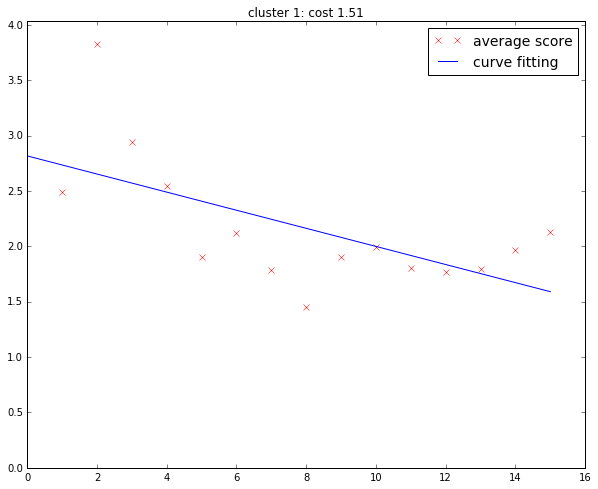

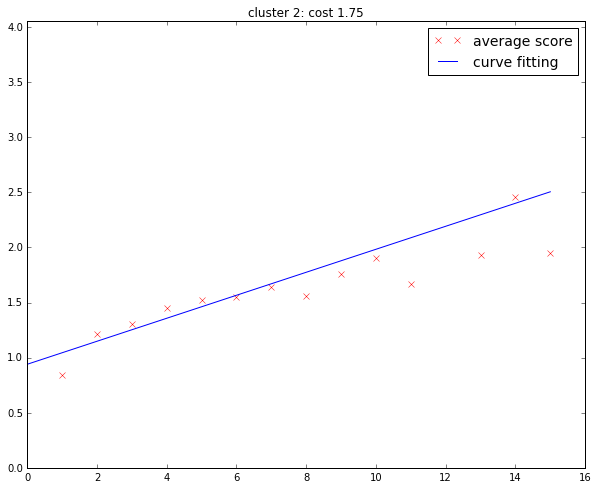

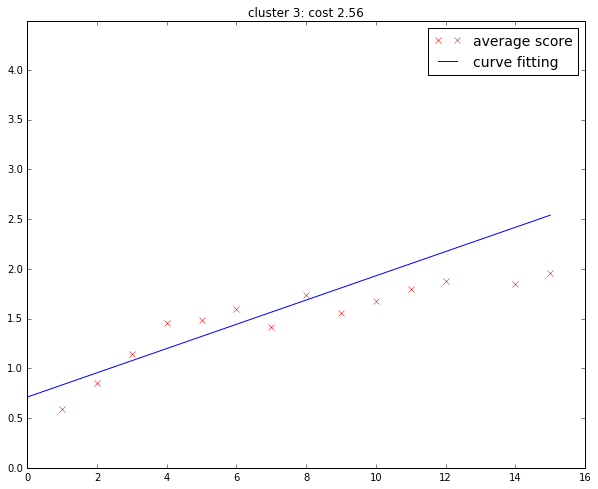

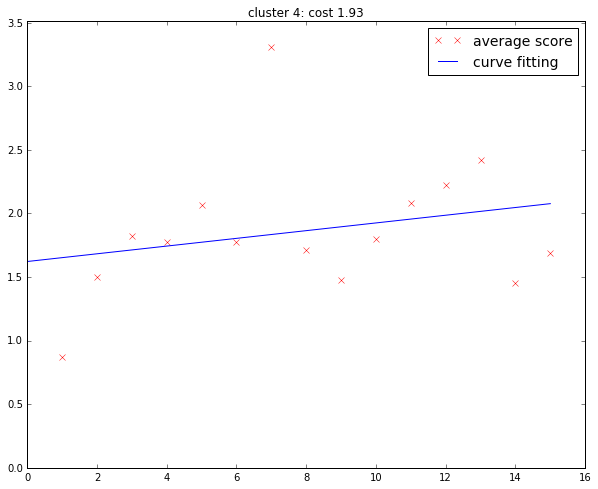

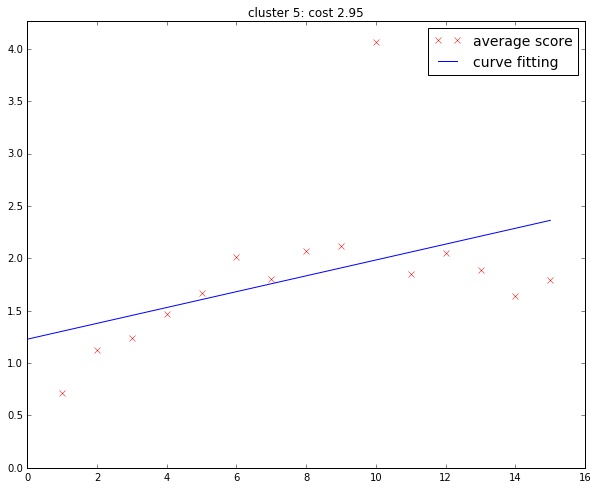

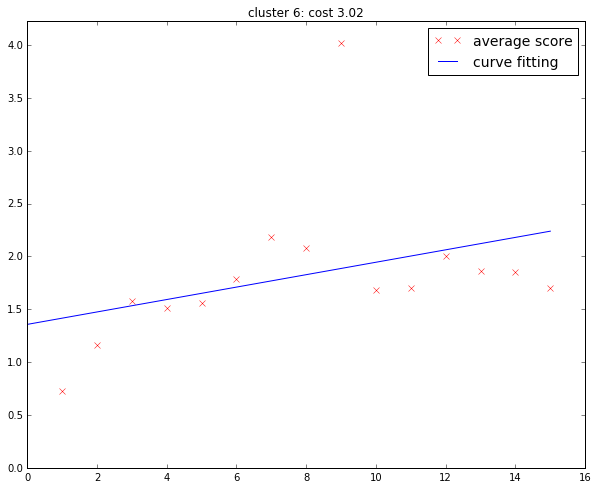

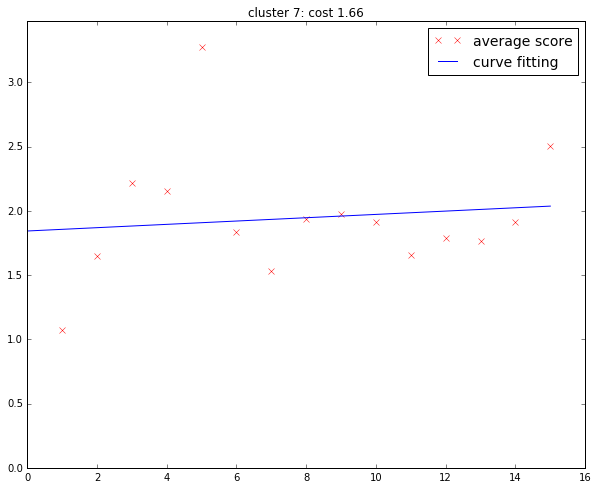

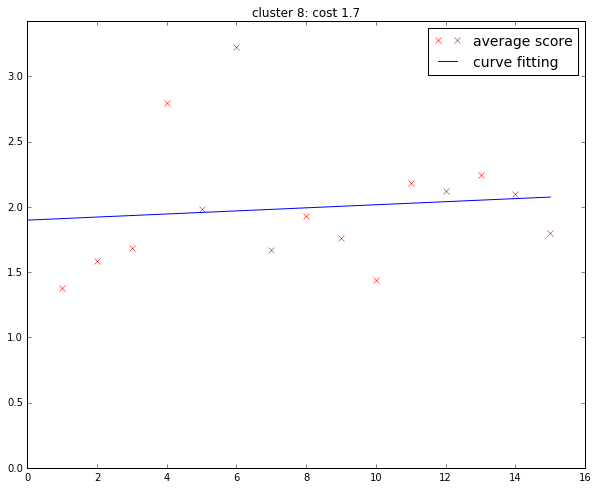

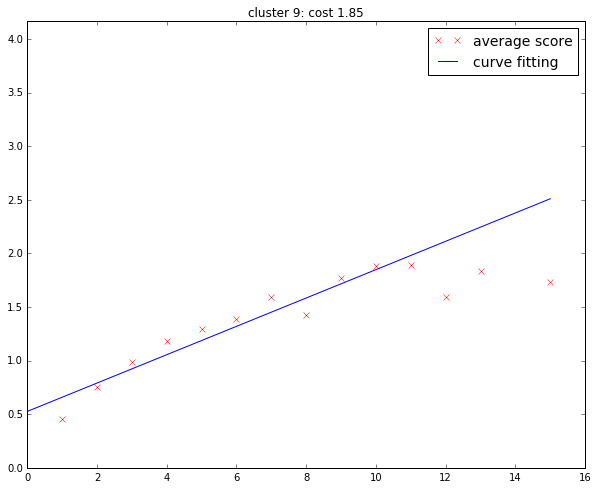

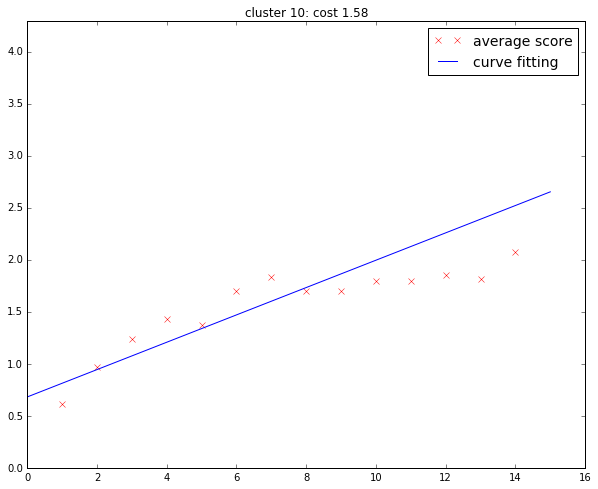

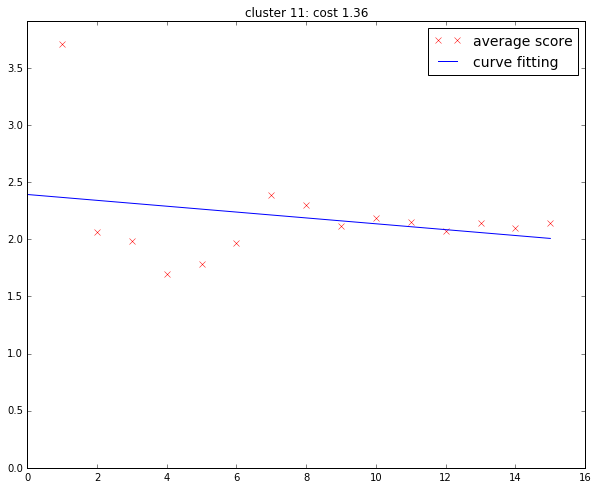

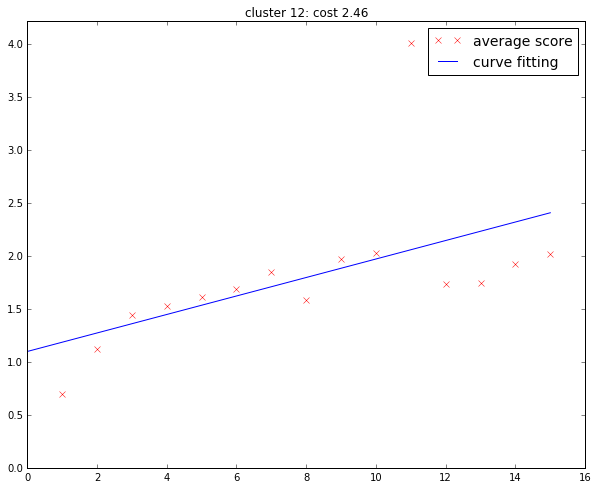

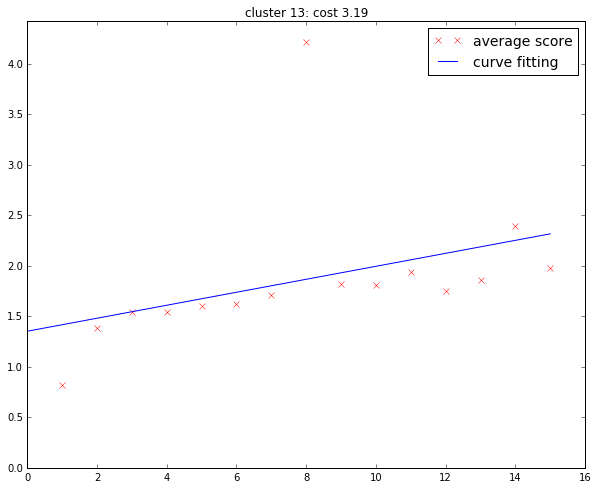

In [7]:
dcp.make_folders("Figs/curve_fitting/polynomial2")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    opt = "poly2_opt{0}".format(i+1)
    cov = "poly2_cov{0}".format(i+1)
    cost = "poly2_cost{0}".format(i+1)
    opt, cost = cv.curve_Fitting(
        cv.polynomial_least, cv.polynomial_curve, 
        attempts, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/polynomial2/{0}".format(i+1), clt_num = i+1)

### power law fit

#### Two parameters

Figs/curve_fitting/powerlaw2 already present - Skipping pickling.
cluster 1:
 - Curve Fitting Parameters: [-3.18135036  0.21476216]
 - Curve Fitting Cost: 1.3122061050415539

cluster 2:
 - Curve Fitting Parameters: [-0.81401315 -0.39682173]
 - Curve Fitting Cost: 1.7389511156564754

cluster 3:
 - Curve Fitting Parameters: [-0.62042374 -0.50341258]
 - Curve Fitting Cost: 2.530967076809441

cluster 4:
 - Curve Fitting Parameters: [-1.41712747 -0.14492038]
 - Curve Fitting Cost: 1.7389441577280815

cluster 5:
 - Curve Fitting Parameters: [-1.03529806 -0.29633517]
 - Curve Fitting Cost: 2.5861841402455514

cluster 6:
 - Curve Fitting Parameters: [-1.14615207 -0.24343897]
 - Curve Fitting Cost: 2.6802114196476166

cluster 7:
 - Curve Fitting Parameters: [-1.69034878 -0.07503267]
 - Curve Fitting Cost: 1.5860354845057612

cluster 8:
 - Curve Fitting Parameters: [-1.74180487 -0.07172421]
 - Curve Fitting Cost: 1.6279433172521394

cluster 9:
 - Curve Fitting Parameters: [-0.47436304 -0.6003776

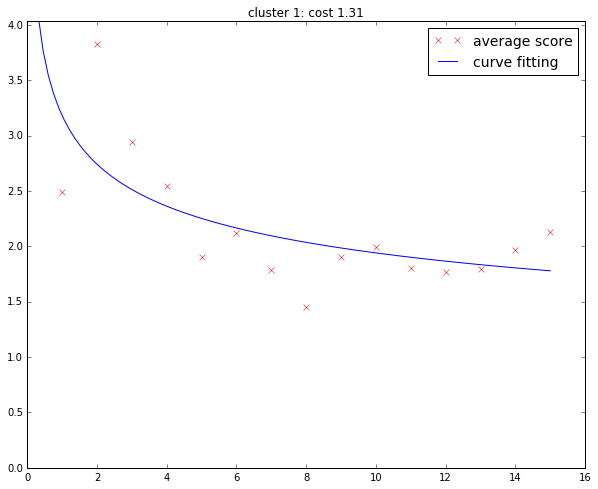

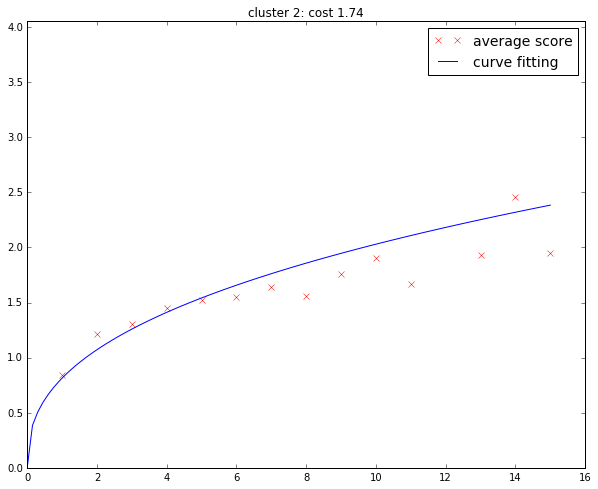

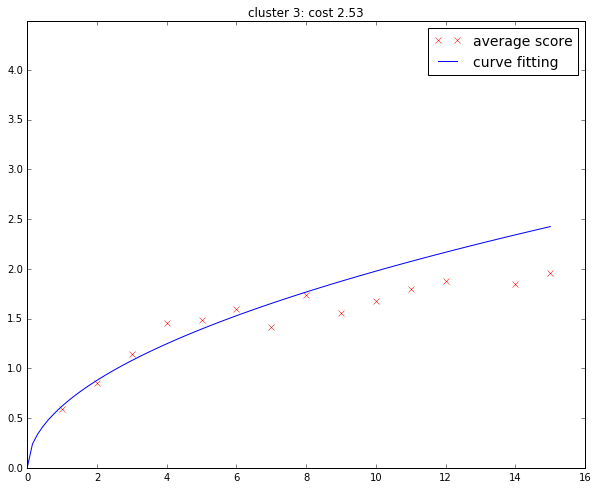

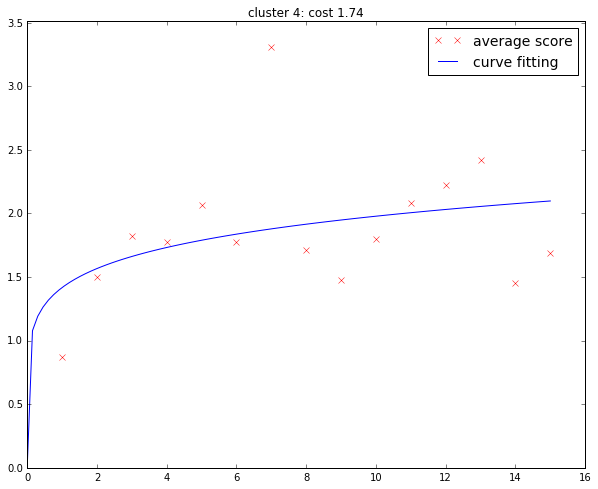

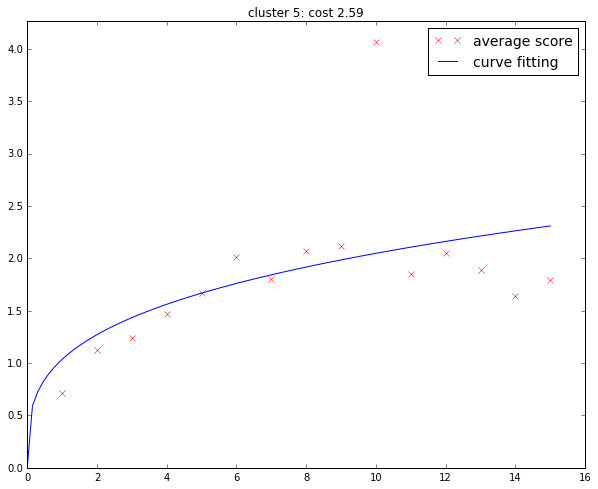

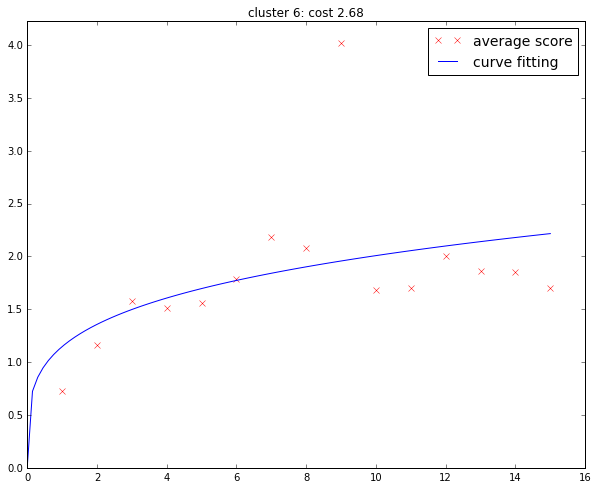

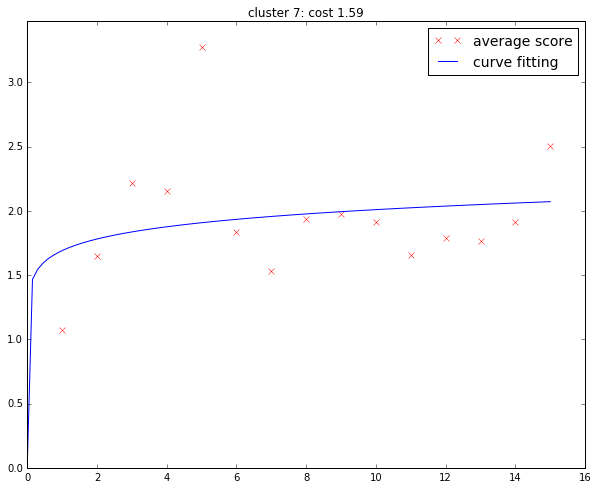

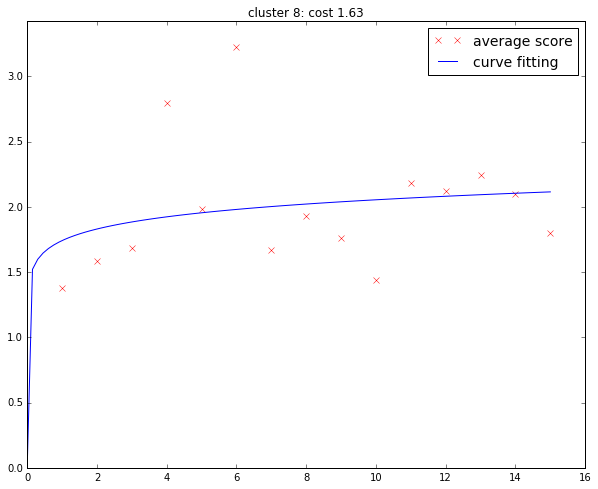

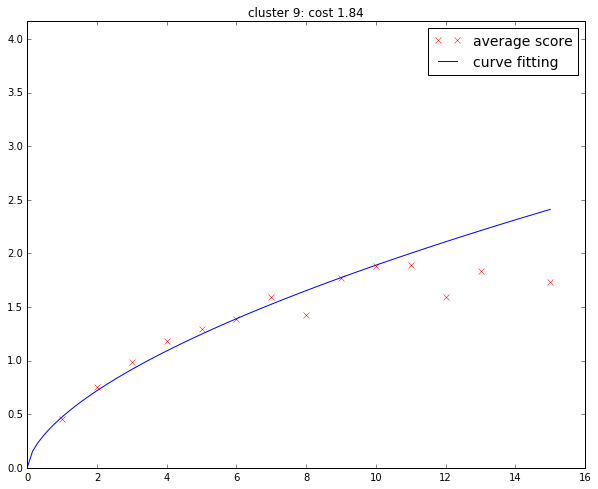

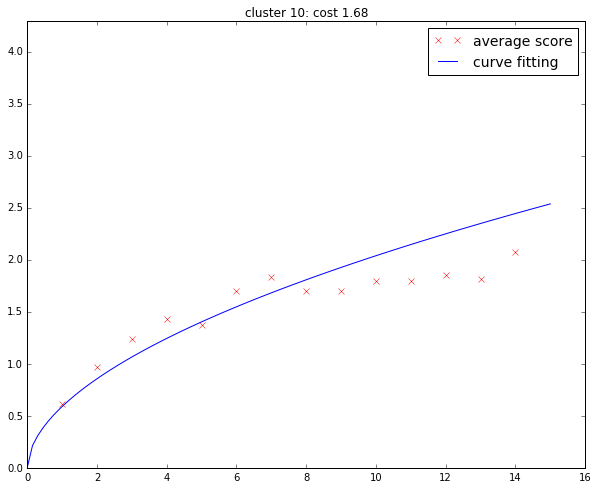

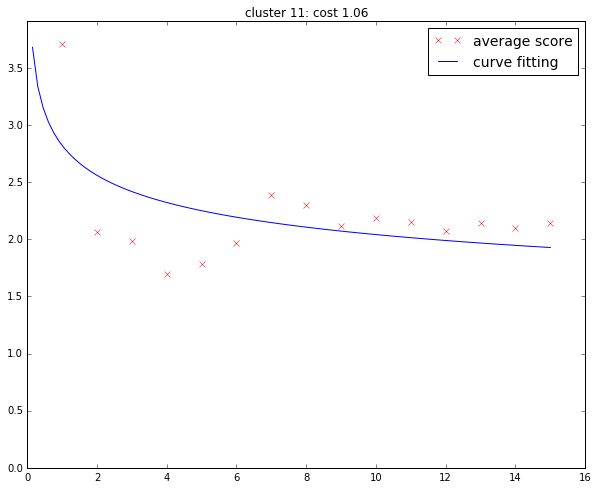

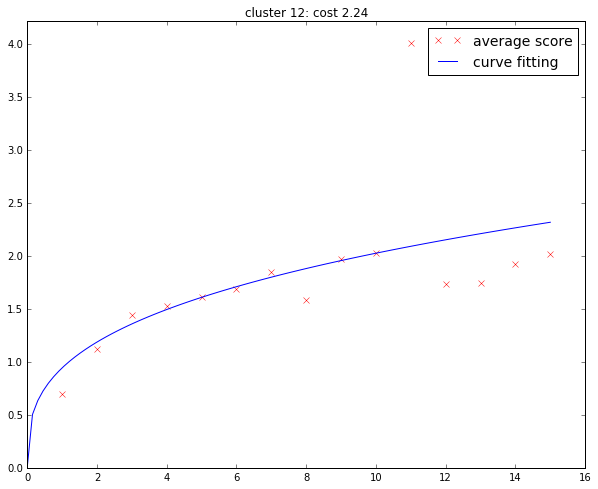

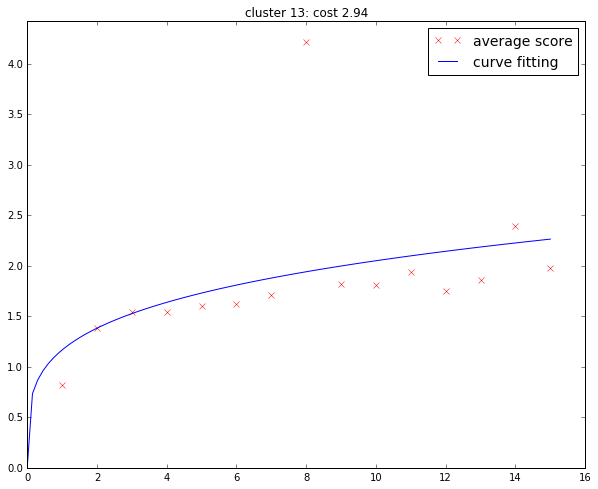

In [8]:
dcp.make_folders("Figs/curve_fitting/powerlaw2")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    opt = "pl2_opt{0}".format(i+1)
    cov = "pl2_cov{0}".format(i+1)
    cost = "pl2_cost{0}".format(i+1)
    opt, cost = cv.curve_Fitting(
        cv.powerlaw_least2, cv.powerlaw_curve2, 
        attempts, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/powerlaw2/{0}".format(i+1), clt_num = i+1)

#### Thress parameters

Figs/curve_fitting/powerlaw3 already present - Skipping pickling.
cluster 1:
 - Curve Fitting Parameters: [ -5.53904063e+02   9.44320774e-04  -5.50769695e+02]
 - Curve Fitting Cost: 1.2807349272838473

cluster 2:
 - Curve Fitting Parameters: [  1.77748249e+03   3.29007905e-04   1.77816984e+03]
 - Curve Fitting Cost: 1.8115807006789524

cluster 3:
 - Curve Fitting Parameters: [  1.87121193e+03   3.67826682e-04   1.87161886e+03]
 - Curve Fitting Cost: 2.6189028854992467

cluster 4:
 - Curve Fitting Parameters: [ 1.16821735  1.65273681  2.01270021]
 - Curve Fitting Cost: 1.4387847674098662

cluster 5:
 - Curve Fitting Parameters: [ 2.20740215  0.48614796  2.7974576 ]
 - Curve Fitting Cost: 2.3795703145290905

cluster 6:
 - Curve Fitting Parameters: [ 1.67457406  0.78289207  2.3080961 ]
 - Curve Fitting Cost: 2.415876072219809

cluster 7:
 - Curve Fitting Parameters: [ 0.96244397  3.0471855   2.02264083]
 - Curve Fitting Cost: 1.2558125376066291

cluster 8:
 - Curve Fitting Parameters: [ 0

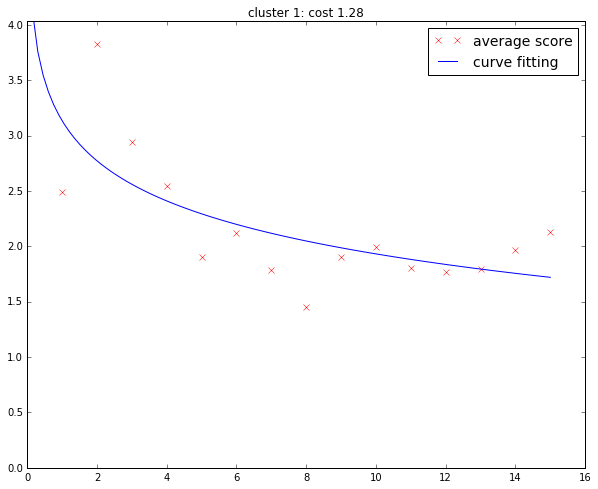

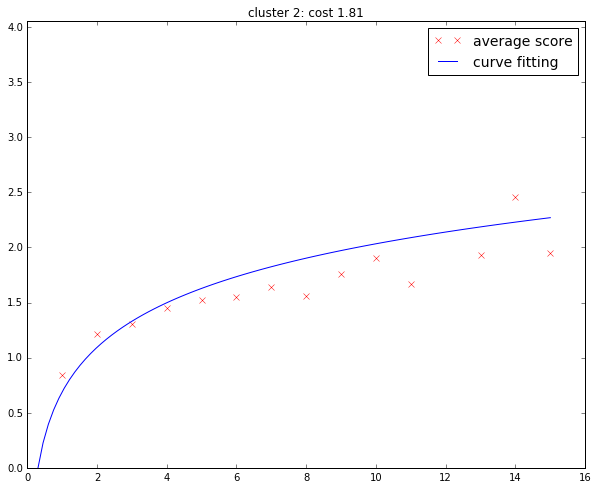

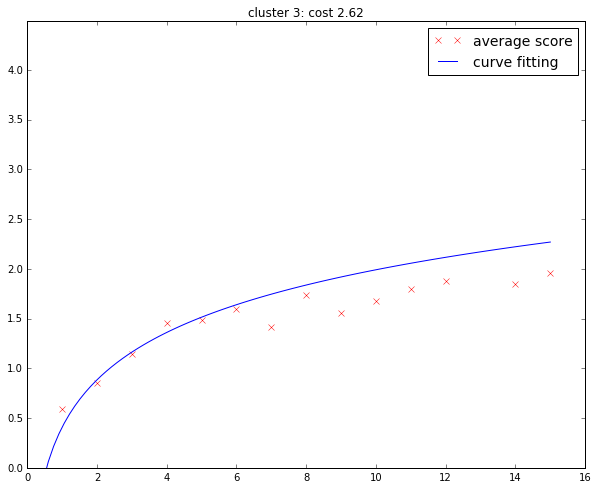

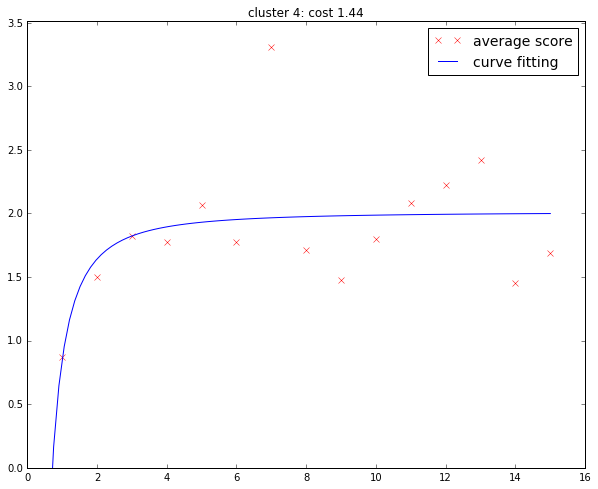

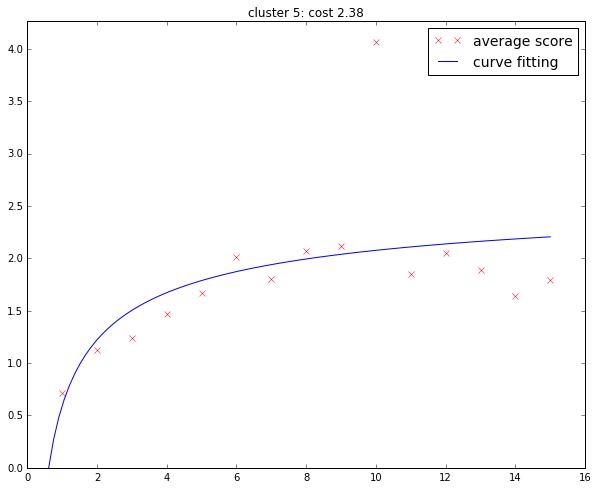

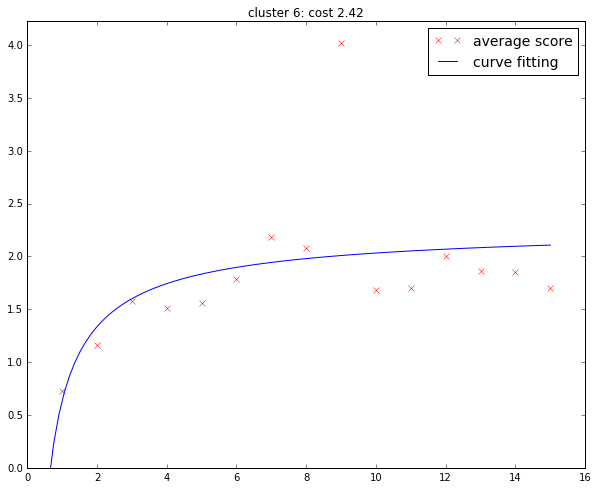

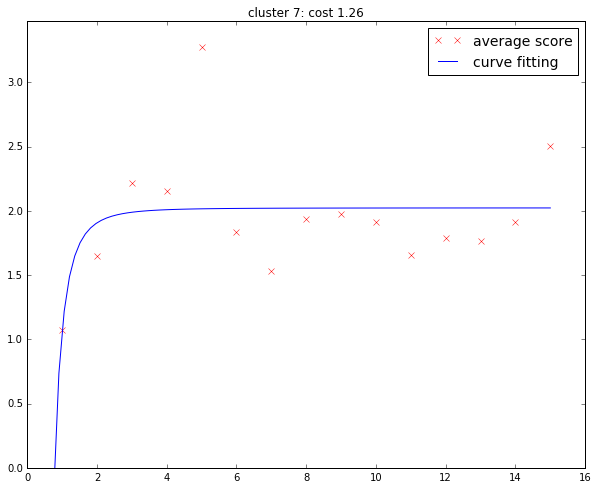

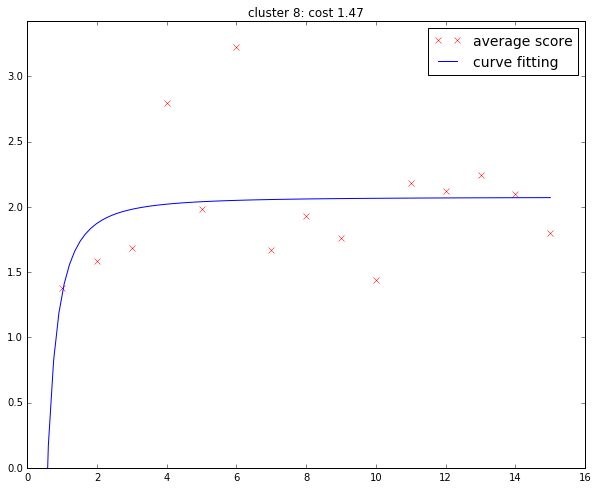

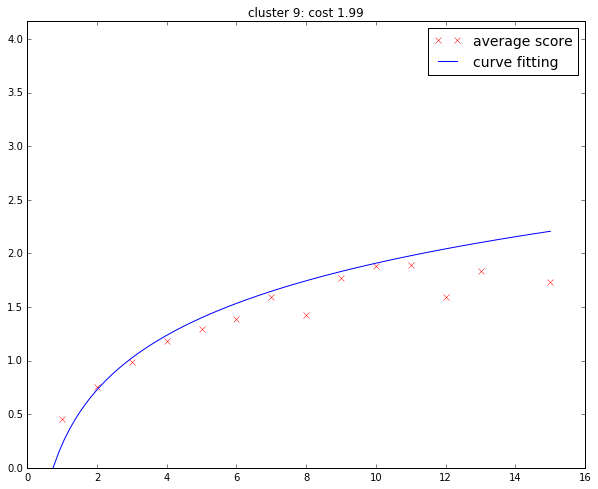

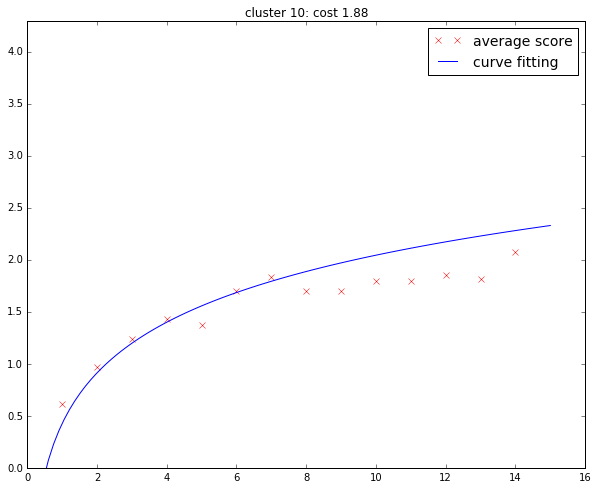

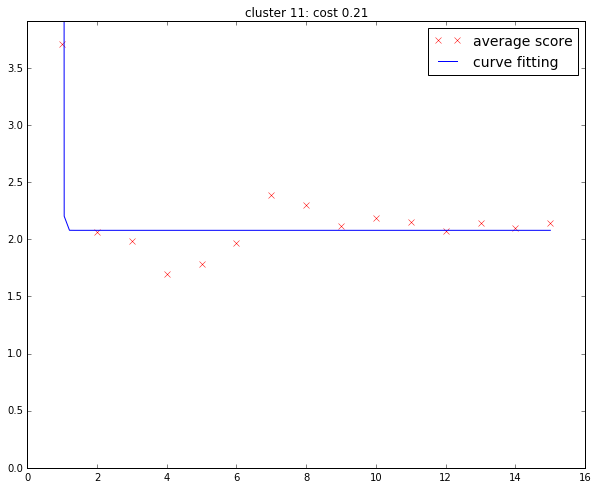

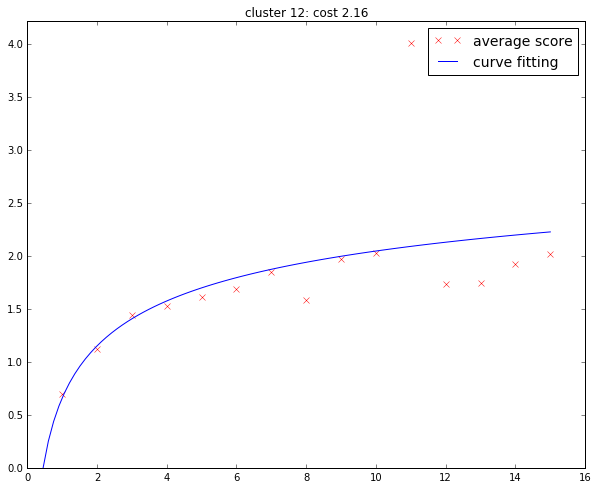

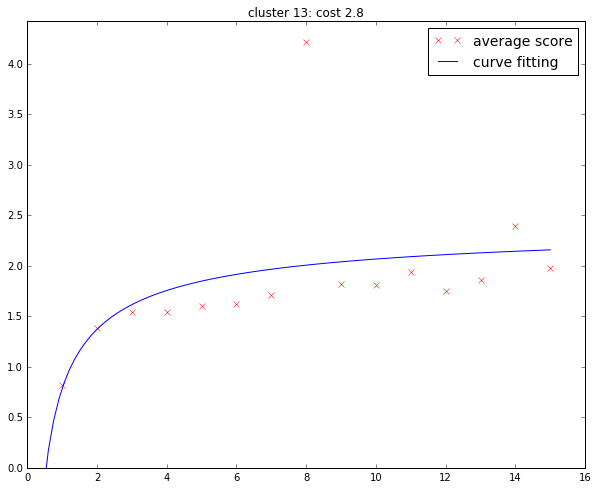

In [9]:
dcp.make_folders("Figs/curve_fitting/powerlaw3")

seed = [1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    opt = "pl3_opt{0}".format(i+1)
    cov = "pl3_cov{0}".format(i+1)
    cost = "pl3_cost{0}".format(i+1)
    opt, cost = cv.curve_Fitting(
        cv.powerlaw_least3, cv.powerlaw_curve3, 
        attempts, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/powerlaw3/{0}".format(i+1), clt_num = i+1)

#### Four parameters

Figs/curve_fitting/powerlaw4 already present - Skipping pickling.
cluster 1:
 - Curve Fitting Parameters: [-680.43164973    2.53185036    1.54784788    9.85655961]
 - Curve Fitting Cost: 1.154834326100752

cluster 2:
 - Curve Fitting Parameters: [ 620.27211786    1.42071176    4.86358233   34.31205398]
 - Curve Fitting Cost: 1.7255832318895705

cluster 3:
 - Curve Fitting Parameters: [  8.29224317e+01   2.56658266e-02   7.88677305e+01   8.96257397e+00]
 - Curve Fitting Cost: 2.5362409027000172

cluster 4:
 - Curve Fitting Parameters: [  4.39457944e+10   1.03304401e+01   1.99488903e+00   9.58927996e+00]
 - Curve Fitting Cost: 1.4155379314251664

cluster 5:
 - Curve Fitting Parameters: [  1.44820526e+11   8.15814741e+00   2.20704478e+00   2.10568226e+01]
 - Curve Fitting Cost: 2.272737515677362

cluster 6:
 - Curve Fitting Parameters: [  4.28419823e+11   9.02162447e+00   2.09937234e+00   1.77162682e+01]
 - Curve Fitting Cost: 2.3347776546570858

cluster 7:
 - Curve Fitting Parameters: [ 

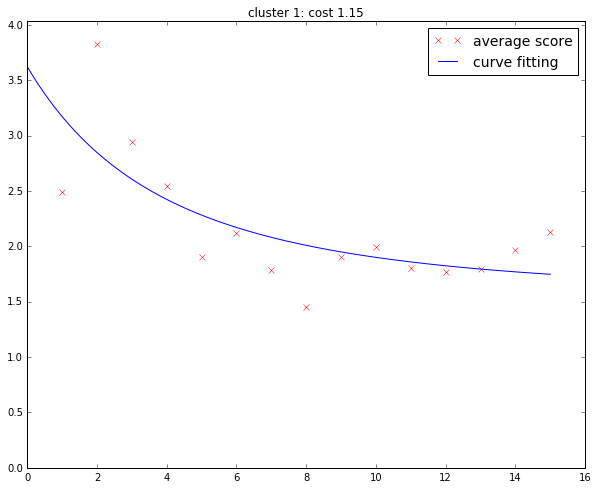

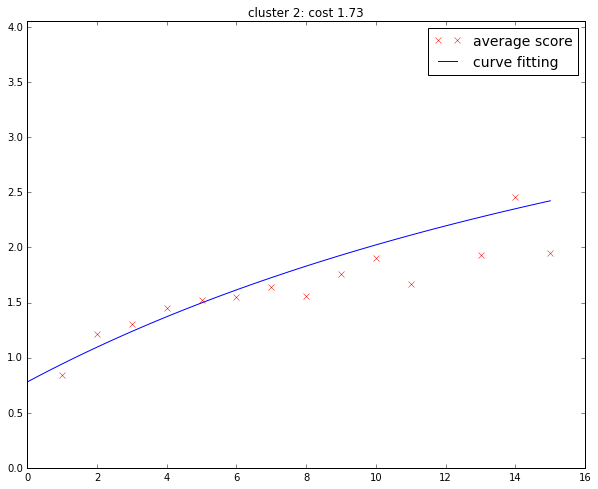

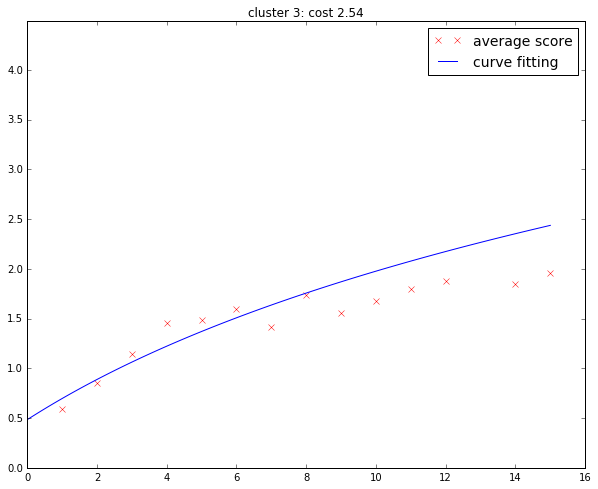

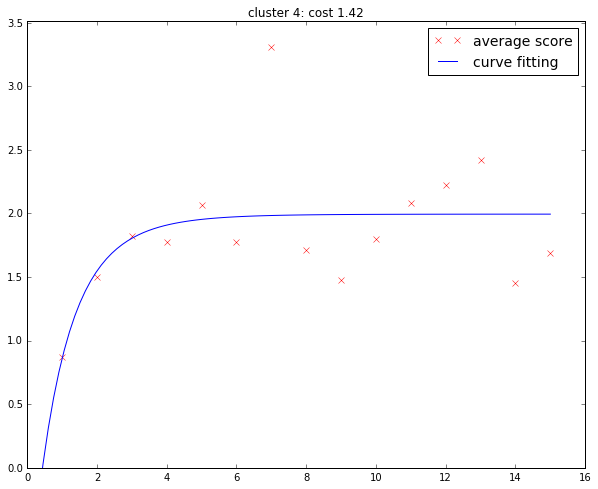

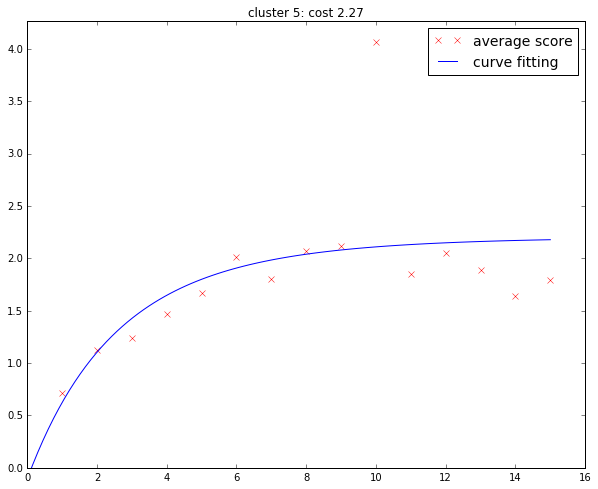

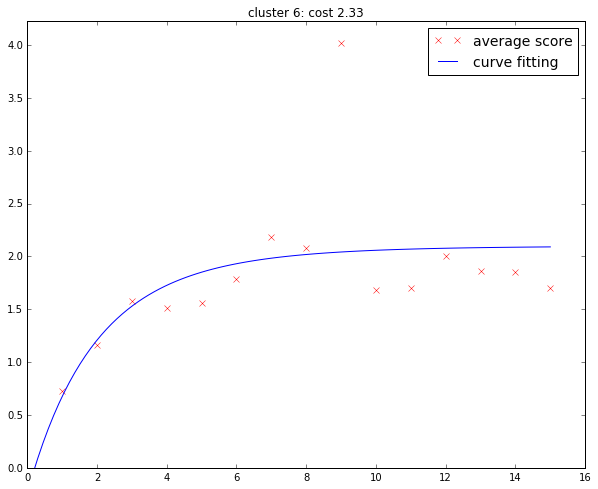

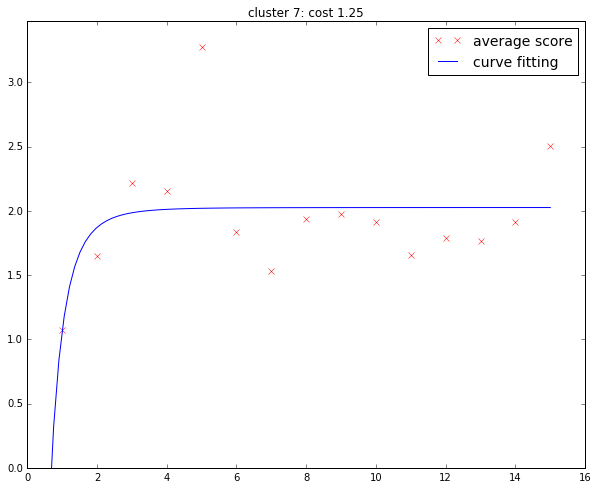

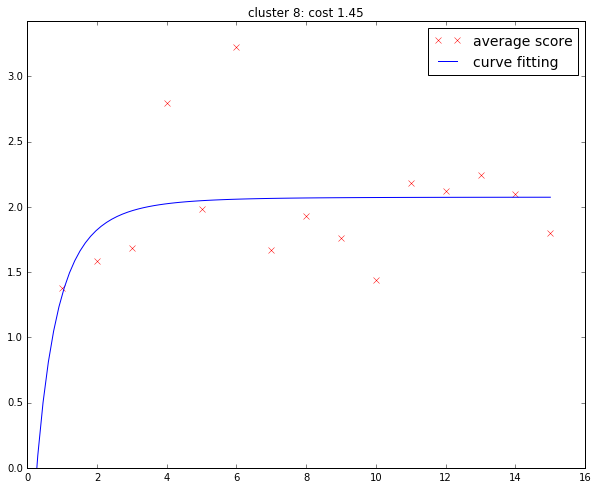

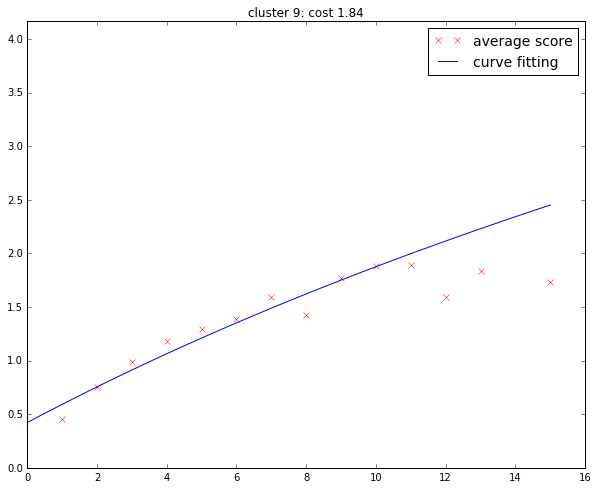

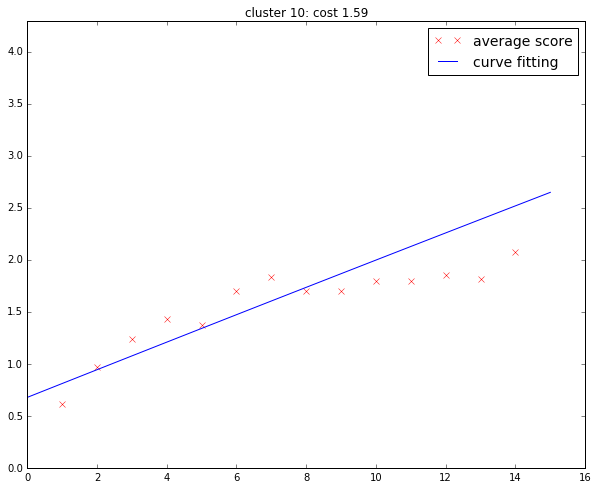

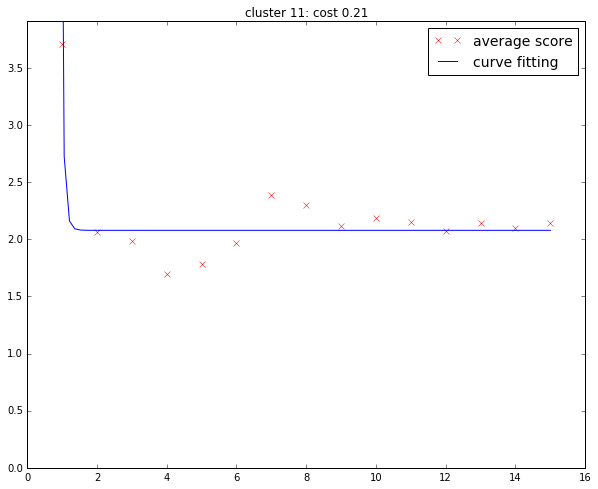

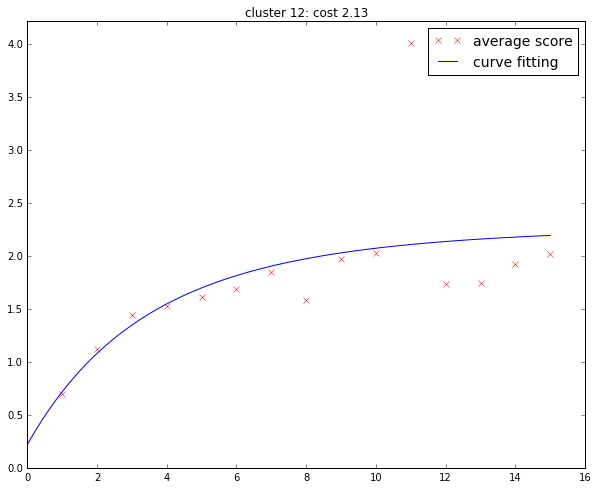

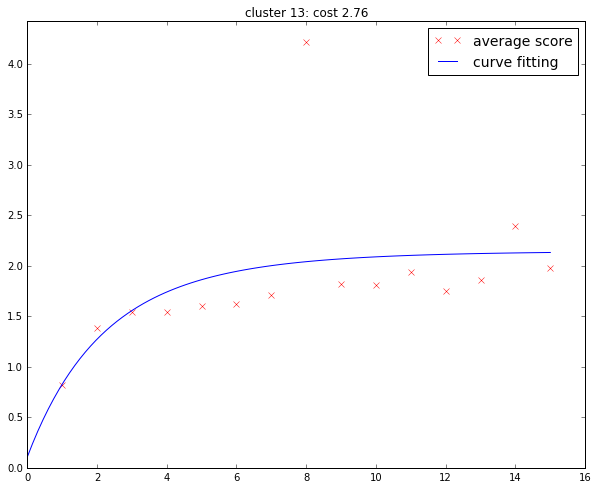

In [10]:
dcp.make_folders("Figs/curve_fitting/powerlaw4")

seed = [1, 1, 1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    opt = "pl4_opt{0}".format(i+1)
    cov = "pl4_cov{0}".format(i+1)
    cost = "pl4_cost{0}".format(i+1)
    opt, cost = cv.curve_Fitting(
        cv.powerlaw_least4, cv.powerlaw_curve4, 
        attempts, eval("avg{0}".format(i+1))[:15], seed,
        "Figs/curve_fitting/powerlaw4/{0}".format(i+1), clt_num = i+1)